# Homework 5

This homeworks consists of two parts: theory and applications. You will:

In the **theory** part:
1. Practice applying the definitions of **convexity**
2. (Extra Credit, at the end): Prove a statement regarding **gradient descent**.

In the **applications** part:
1. Code a simple gradient descent procedure and analyze the effects of **step size** and **noise**. 
2. Use your understanding of SVM to perform image classification on the dataset [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist). For this task we will use `skimage` Python library to generate special image features to feed to the SVM classifier. 


## Part 1: Theory / Written Problems (6 pts)

You must attempt all problems for credit. Please ask for help early if you are unsure.

### Question 1 (6 pts)

Show using a couple equations or inequalities) whether the following functions are or are not **convex**. Your argument must contain more than just a graphical argument.

1.  $ f(x) = x^2 $, where $x \in \mathbb{R}$ is a scalar.
2. $ f(x) = \sin(x) $ where x is a scalar.
3. $ f(x) = x^T A x + b^Tx + c$, where $A$ is a positive definite $d \times d$ matrix and $x \in \mathbb{R}^d$ is a d-dimensional vector. $b$ is a constant d-dimensional vector and $c$ is a constant scalar.

1. If we take the first derivative we get 2x, then if we take the second derivative we get 2, so we can see that the second derivative is always positive, and therefore the function $f(x) = x^{2}$ is convex.  

2. sin(x) when we take the first derivative we get cos(x), Then when we derivate again we get back to -sin(x) -sin(x) can be negative so this function is not convex. 

3. we have an equivalent of an $x \dot x^{T}$ which functions like $x^{2}$ but in $R^{n}$, so when we derivate the only term that will remain in the second derivative is a positive real valued vector so yes this function is in fact convex since the second derivative is always positive.

## Part 2: Gradient Descent Coding Exercise (10 pts)

Consider the function given below:
$$\psi(x) = \bigg(\frac{x}{2}-3\bigg)^2$$

If the task was to find the minima of the function above, one way of doing this would be to calculate the derivative of the function $f'(x)$ and find the value of $x$ for which $f'(x) = 0$. <br>

But we learned another technique in class which also involved calculating derivatives(partial derivatives) with respect to parameters which would minimize a  loss function for a machine learning algorithm for which finding the optima isn't as straight forward as described in the paragraph above. This technique is __Gradient Descent__. 

It involves initializing the parameter to be optimized at a random location in the landscape(curve described by the function) of the function and taking controlled steps toward the optima of an amount proportional to the negative of the gradient at that current point. Say we were trying to optimize a function $f(\Theta)$ which is a function of $\Theta = \{\theta_i | i\in\{1...n\}\}$. Taking a step toward the minima would look as below:
$$ \theta_i = \theta_i - \alpha \frac{\delta}{\delta\theta_i}f(\Theta)$$

In the following sections we shall optimize the single parameter function $\psi(x)$ using gradient descent.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
def function(x):
    """
    Given a variable / np.array of variables x return the corresponding values of function descibed above
    Note that this x can be single numeric variable or a numpy array
    
    Args: x - single numeric variable or a np.array
          
    Returns:
          y - corresponding value for the function described
    """
    # YOUR CODE HERE
    return ((x / 2) - 3)**2

In [4]:
# Here are a couple of tests to check your implementation
test_fx = function(2.0)
assert( test_fx == 4)
test_fx2 = function(6.0)
assert(test_fx2 == 0.0)

In [5]:
def gradient(x):
    """
    Given a numeric variable x calculate the corresponding gradient value which is the value of f'(x)
    
    Args: x - single numeric variable
          
    Returns: 
          delta - corresponding value for the derivative of the function being considered
    """
    # YOUR CODE HERE
    return (x / 2) - 3

In [6]:
test_fx_grad = gradient(2.0)
assert( test_fx_grad == -2)
assert(gradient(6.0) == 0.0)

In [7]:
def gradient_descent(x, alpha):
    """
    Given a numeric variable x calculate the corresponding gradient value which is the value of f'(x)
    
    You should terminate your function when either 
    
    1. 1000 steps have been reached
    or
    2. The norm of the step size is less than some fixed, small value (like 1e-3)
    
    Args: 
        x - single numeric variable or a np.array from where the optimization must start.
        alpha - learning rate / step size to control the updates made to x during the optimization process
        
          
    Returns: 
          path (np.ndarray) that contains the values x takes while approaching the minima
          steps (int) that is the number of steps it had to take to reach there
    """
    # YOUR CODE HERE
    phi = 10
    step = 0
    xi = x
    path = np.array([x])
    while step < 1000 and phi > 1e-3:
        xold = xi
        xi = xi - (alpha * gradient(xi))
        phi = np.linalg.norm(xold - xi)
        path = np.append(path, xi)
        step += 1
        
    return path, step

4. Complete the function below that tracks the paths followed(different values of $x$ as you perform the updates) and number of steps taken by gradient descent for $x$ initialized at specific value and a range of alpha values specified and stores the results in a dicitionary indexed on the alpha values. Structure of the Dictionary returned has been described below. 

The following cell is a test which get the results for $x=-20.0$ and $\alpha$ values `[0.0001, 0.01, 0.1, 0.2, 1.0, 3.0, 5.0]` and prints number of steps taken for each alpha value. 

In [8]:
def optimize_and_evaluate(x, alphas):
    """
    Given a numeric variable x which contains the starting point in the function curve
    and the set of learning rates provided in alphas track the path followed and steps while performing gradient
    descent using gradient_descent function you wrote above and return it in a dictionary indexed on alpha values.
    
    Args: 
        x - single numeric variable or a np.array from where the optimization must start.
        alphas - learning rates / step sizes to control the updates made to x during the optimization process
        
          
    Returns: 
          gradient_descents ( dict() ) which has the following structure
          {
              alpha_1 : {
                  path : np.ndarray(),
                  steps : int
              }
              ...
          }
          
          eg. 
          {
              0.1 : {
                  path: [1,2,3...],
                  steps : 10
              },
              0.2 : {
                  path: [1,2,3...],
                  steps : 10
              },... 
          }
    """
    # YOUR CODE HERE
    g = {}
    for alpha in alphas:
        path, steps = gradient_descent(x, alpha) 
        g[alpha] = {'path':path, 'steps':steps}
    return g

In [9]:
# Runs your code above and prints the number of steps until termination.
alphas = [0.0001, 0.01, 0.1, 0.2, 1.0, 3.0, 5.0]
x = -20.0
result = optimize_and_evaluate(x, alphas)
for alpha in alphas:
    print(result[alpha]['steps'])

1000
973
141
76
15
17
1000


In [10]:
result[0.01]['path']

array([-2.00000000e+01, -1.98700000e+01, -1.97406500e+01, -1.96119468e+01,
       -1.94838870e+01, -1.93564676e+01, -1.92296852e+01, -1.91035368e+01,
       -1.89780191e+01, -1.88531290e+01, -1.87288634e+01, -1.86052191e+01,
       -1.84821930e+01, -1.83597820e+01, -1.82379831e+01, -1.81167932e+01,
       -1.79962092e+01, -1.78762282e+01, -1.77568470e+01, -1.76380628e+01,
       -1.75198725e+01, -1.74022731e+01, -1.72852618e+01, -1.71688355e+01,
       -1.70529913e+01, -1.69377263e+01, -1.68230377e+01, -1.67089225e+01,
       -1.65953779e+01, -1.64824010e+01, -1.63699890e+01, -1.62581390e+01,
       -1.61468483e+01, -1.60361141e+01, -1.59259335e+01, -1.58163039e+01,
       -1.57072224e+01, -1.55986862e+01, -1.54906928e+01, -1.53832393e+01,
       -1.52763231e+01, -1.51699415e+01, -1.50640918e+01, -1.49587714e+01,
       -1.48539775e+01, -1.47497076e+01, -1.46459591e+01, -1.45427293e+01,
       -1.44400156e+01, -1.43378156e+01, -1.42361265e+01, -1.41349459e+01,
       -1.40342711e+01, -

5. The below code plots the results of the procedure which you have written. Inspect the plots and answer the below questions.

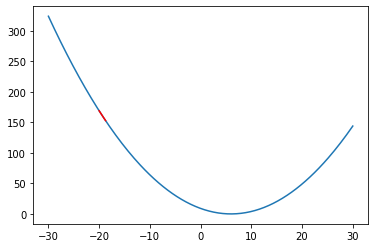

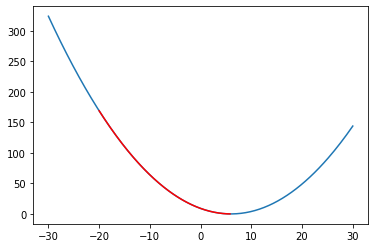

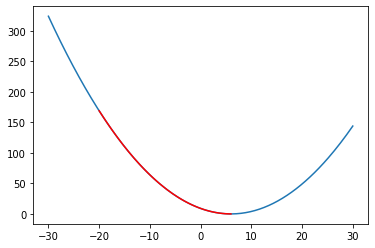

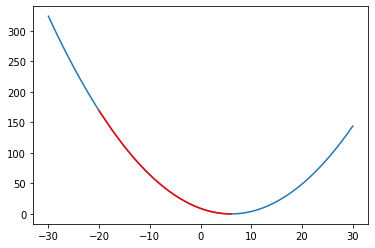

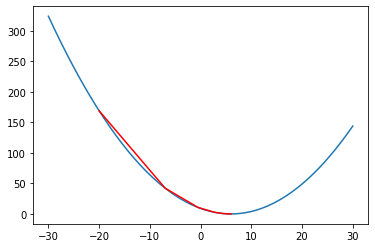

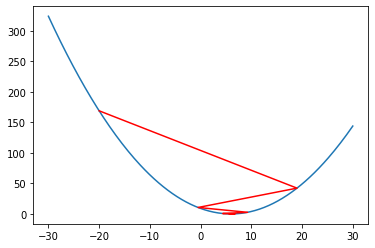

C:\Users\tsmar\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == '':
C:\Users\tsmar\Anaconda3\lib\site-packages\matplotlib\ticker.py:2036: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


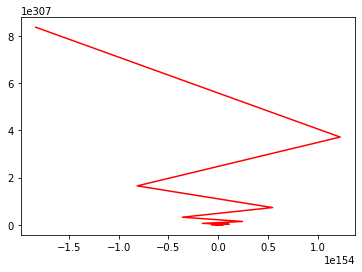

In [11]:
X = np.linspace(-30.0, 30, 200)
y = function(X)

for alpha in alphas:
    plt.plot(X, y)
    plt.plot(result[alpha]['path'], function(result[alpha]['path']), color="red")
    plt.show()

6. Comment on what you observe:

How does the value of $\alpha$ affect the path followed and steps taken? 

How does the slope of the function interact with the learning rate? I.e. if we had a function that was a "shallower" quadratic function than above or "steeper", is our maximally convergent $\alpha$ larger or smaller than what we have for this function?

with an alpha too close to zero (around $.0001$) we take tiny steps so even over $1000$ iterations we don't make too much progress.

With alpha alot higher we end up jumping back and forth from side to side of the convex curve. 

The slope of the function modifies the learning rate; when we are at a steeper slope we take a bigger step with a fixed learning rate

when we reach a low gradient (close to a local minima) then we take a smaller step with a fixed learning rate. 

## Part Three: Support-Vector Machine Coding Exercise 

In this part we will perform multi-class classification with SVM to classify images of clothing from [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist).

The whole point of this dataset is to be a drop-in replacement for MNIST. All the images are 28x28 pixels and there are 10 classes (see the below code). There are 60000 training images and 10000 testing images. However, it is in general much harder than MNIST. 

To manage the runtime complexity of using this dataset, we will only use 2000 training images, and 10k testing images.

If you go to the link above, and scroll to the bottom of the GitHub page, you will find a listing of models with reported accuracies. There are some pretty powerful neural networks which only achieve accuracies in the low 90%. There are reported models that use SVM at about ~88%. Because we are going to "compete" with these metrics, we will only use accuracy as a score here. 

The below code downloads and performs feature extraction on the images using DAISY features, which are similar to SIFT features. It's not too important that you understand exactly what they are, but do know that **it will take a couple minutes to perform this process.**

### About the SIFT-like Features (DAISY Features)

Just like how we used Haar features before, we need to create some features to classify the images. Using the raw pixel values like before is going to perform rather poorly. Instead we will use computed features called [DAISY](https://www.epfl.ch/labs/cvlab/software/descriptors-and-keypoints/daisy/) features.

In [1]:
from mnist import get_fashion_mnist
from sklearn.model_selection import train_test_split
import os 
import matplotlib.pyplot as plt
import time
import numpy as np
import cv2
import skimage
from skimage.feature import daisy
from sklearn import preprocessing

def extract_features(images, visualize_first=False):
    feature_size=792
    features = np.zeros((images.shape[0], feature_size))
    print("Extracting features this may take a couple minutes...")
    start = time.time()
    for idx, img in enumerate(images):
        visualize = False
        if(idx == 0 and visualize_first == True):
            visualize=True
        descs = daisy(images[idx].astype(np.uint8), step=4, radius=8, rings=2,histograms=5,
                             visualize=visualize)
        if(visualize):
            plt.imshow(descs[1])
            plt.show()
            descs = descs[0]
        features[idx, :] = descs.reshape(-1)
    end = time.time()
    print("Done. {:.2f} msec".format((end-start)*1000))
    features = preprocessing.scale(features)
    return features


def get_fashion_dataset(subset_train=2000, subset_test=10000):
    x_train,y_train,x_test,y_test = get_fashion_mnist('./')
    x_train,_,y_train,_ = train_test_split(x_train,y_train, train_size=subset_train, 
                                           stratify=y_train, random_state=42, shuffle=True)
    x_test = x_test[:subset_test]
    y_test = y_test[:subset_test]
    dataset = {
        'train': {
            'images': x_train,
            'labels': y_train,
            'features': extract_features(x_train)
        },
        'test': {
            'images': x_test,
            'labels': y_test,
            'features': extract_features(x_test)
        }
    }
    return dataset

def get_label_txt(labels):
    '''
    labels must be a 1-d integer np.array or an integer label.
    will return the string for that label
    '''
    strings = np.array([
            "t-short/top","trouser","pullover","dress","coat","sandal","shirt","sneaker","bag",
            "ankle boot"
    ])
    return strings[labels]


dataset = get_fashion_dataset()

[MNIST] Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
[MNIST] Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
[MNIST] Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
[MNIST] Downloading http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz


Extracting features this may take a couple minutes...
Done. 6177.43 msec
Extracting features this may take a couple minutes...
Done. 27045.79 msec


In [12]:
def plot_image(image, label):
    plt.figure()
    plt.imshow(image, cmap='gray')
    label_text = get_label_txt(label)
    plt.title(label_text)
    plt.show()

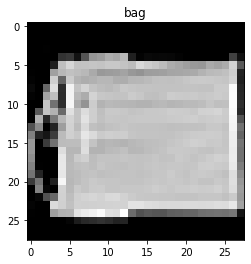

(2000, 792) (10000, 792)


In [13]:
# you should see a picture of a piece of clothing and the clothing label in the title.
img = dataset["train"]["images"][0]
label = dataset["train"]["labels"][0]
plot_image(img, label)

### Feel free to edit this code to familiarize yourself with the dataset.
print(dataset["train"]["features"].shape, dataset["test"]["features"].shape)

### Q1: Build and Evaluate a SVM Model

Previously, we've been using a functional approach to construct models. However, `scikit-learn` does this itself and has enough helper functions so that you can build and test a model in only a couple lines of code. 

We're now going to use these functions to efficiently:

1. Build a SVC model.
2. Perform cross validation with **5 splits** and report the **accuracy** (averaged accross folds) (this is the default metric reported) for the model using `cross_val_score`.

For the SVC model, you can repeat this process to try different kernels and observe how things change. We've created an initial model below. However when you submit, the below cell should only contain 2-3 lines of code. A line that does (1) and a line that does (2) and maybe some print statements.

Cross validation is an extremely expensive process. Be sure to set `n_jobs=-1` in the `cross_val_score` function.

**This is an expensive procdure, it can take several minutes.**

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Here's an initial model you can start with
# model = SVC(kernel='rbf', gamma=0.00001, C=1)
model = SVC(kernel='rbf', C=1.0, gamma='scale')

# YOUR CODE HERE
scores = np.mean(cross_val_score(model, X=dataset["train"]["features"], y=dataset["train"]["labels"], n_jobs=-1, cv=5))

print("accuracy: %f" % scores)

accuracy: 0.822000


### Q2: Cross Validation Grid Search (4 pts)

Now we will perform cross validation to select the $C$ and $\gamma$ paramters for the `rbf` kernel.

This should follow what we demonstrated during the hands-on. You should use the Scikit-learn `GridSearchCV` method to perform cross validation. You can use `cv=5` for the number of folds.

For a large dataset, this can be an expensive procedure. 

**First write your solution, only passing in small subset (~100) of the trainin data to your GridSearchCV call. Once you have it working, time it and estimate how long it will take for the full training dataset before executing.**

We have two parameters we need to select: $\gamma$, which is the parameter for the RBF kernel, and the $C$ paramter, which controls the slack penalty. (Refer to the hands on if you forgot about these.)

Make sure to read the [docs]() on `GridSearchCV`. Many parameters are useful, such as `n_jobs`. We recommend setting it to `-1` to use all cores on your CPU.

You can use the below to methods to plot the grid returned by the `GridSearchCV` method.

In [19]:
class MidpointNormalize(plt.Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        super(MidpointNormalize,self).__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))
def plotSearchGrid(grid):
    
    scores = [x for x in grid.cv_results_["mean_test_score"]]
    scores = np.array(scores).reshape(len(grid.param_grid["C"]), len(grid.param_grid["gamma"]))

    plt.figure(figsize=(10, 8))
    plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
    plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
               norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
    plt.xlabel('gamma')
    plt.ylabel('C')
    plt.colorbar()
    plt.xticks(np.arange(len(grid.param_grid["gamma"])), grid.param_grid["gamma"], rotation=45)
    plt.yticks(np.arange(len(grid.param_grid["C"])), grid.param_grid["C"])
    plt.title('Validation accuracy')
    plt.show()

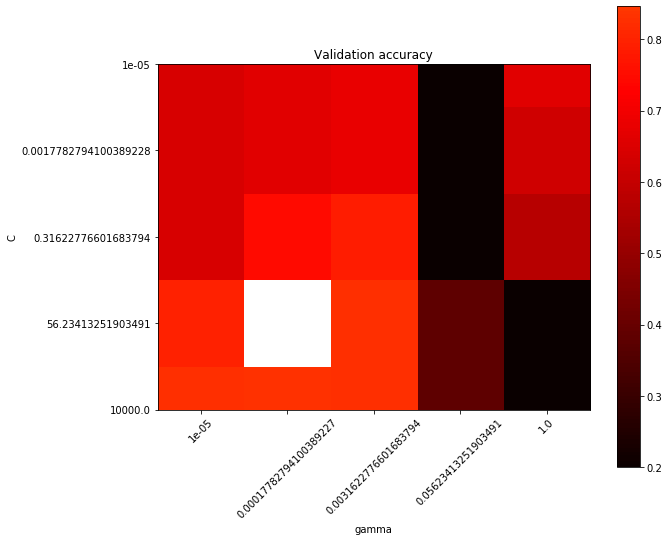

In [22]:
from sklearn.model_selection import cross_val_score, GridSearchCV

# Use the following values for your C and gamma values in your grid search.
c_range = np.logspace(-5, 4, 5, base=10)
g_range = np.logspace(-5, 0, 5, base=10)
param_grid = {
    'gamma': g_range,
    'C': c_range
}
# YOUR CODE HERE
clf = GridSearchCV(model, param_grid=param_grid,cv=5, n_jobs=-1)
clf.fit(dataset["train"]["features"], dataset["train"]["labels"])
plotSearchGrid(clf)

### Q3: Final Model (3pt)

The `GridSearchCV` method automatically returns the best model,traubed on the full training set with the best paramaters in the grid. It can  be accessed using `grid._best_estimator_`.

Take the best model and predict on the test set, and report your accuracy and confusion matrix, and print out the best parameters.

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
yh = clf.predict(dataset["test"]["features"])
ytrue = dataset["test"]["labels"]

a = accuracy_score(ytrue, yh)
cmat = confusion_matrix(ytrue, yh)

print("accuracy %f" % a)
print(cmat)
print(clf.best_estimator_)

accuracy 0.843900
[[781   0  30  43   8   1 120   0  17   0]
 [  3 952   5  33   2   0   3   0   2   0]
 [ 26   1 728   9 118   0 112   0   6   0]
 [ 33  11  19 840  39   0  51   0   7   0]
 [  2   4  64  33 815   0  80   0   2   0]
 [  0   0   0   0   0 945   1  38   1  15]
 [134   2  82  43 145   0 580   0  14   0]
 [  0   0   0   0   0  38   0 929   0  33]
 [  7   1   6   4   9   4  14   4 951   0]
 [  0   0   0   0   0  24   0  57   1 918]]
SVC(C=56.23413251903491, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.00017782794100389227,
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)


## Extra Credit (4 pts)

Gradient descent is a very simple algorithm conceptually:

Given a differentiable function which we would like to minimize, $f: \mathbb{R}^d \rightarrow \mathbb{R}$, and a starting point, $x_k \in \mathbb{R}^d$, we iteratively "step" in the opposite direction of the gradient evaluated at that point, $\nabla f(x_k) \in \mathbb{R}^d$, with a step size $\alpha > 0$ until we have converged to a local minimum:

$$x_{k+1} = x_k - \alpha \nabla f(x_k)$$

How can we prove that $-\nabla f$ is the "best" direction to step? Well, it is the best if it is the "steepest" descent, AKA the direction of maximum decrease, relative to all other direction vectors of the same length. To prove this, we will assume that the following statement (which can be made more formal based on the smoothness of $f$ and Taylor's theorem):

$$ f(x+ \alpha p) = f(x) +  \alpha \nabla f(x)^T p + \epsilon(x_k) \quad \quad |\epsilon(x_k)| << |f(x)^Tp | $$

In the above equation, $p$ determines the direction of the step. Using this assumption, argue that 

$$ \min_{p} p^T \nabla f(x_k) \quad \text{subject to} \,\, \|p\| =1 $$  

is a reasonable criteron for selecting the best direction and show that 

$$\frac{-\nabla f(x_k)}{\|f(x_k)\|}$$

is the solution to this criteron.



The direction of the negative gradient will be the steepest step downhill that we can take, so if we are subject to having a p that determines the direction with ||p|| == 1 then it makes sense to normalize the gradient vector, multiply by negative one, and this is the best solution. 